In [1]:
from project_steve import *
import anuga
import pandas

import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

date and time: 20240626_162217


In [8]:
# Create a wrapper for contents of sww file
swwfile = 'domain_10785_canal_4_20240611_105728.sww'
#swwfile = 'domain_10785_canal_4_20240611_201959.sww'
#swwfile = 'domain_10785_canal_4_20240611_210751.sww'
#swwfile = 'domain_10785_canal_4_20240611_222210.sww'
swwfile = 'domain_10785_canal_4_20240613_202206.sww'

splotter = anuga.SWW_plotter(swwfile)

# Convert to absolute corrdinates
xc = splotter.xc + splotter.xllcorner
yc = splotter.yc + splotter.yllcorner

gauge_location = pandas.read_csv(gauge_filename)
gauge_x = gauge_location['easting'].to_numpy()
gauge_y = gauge_location['northing'].to_numpy()

gauge_ids = []
for row in zip(gauge_x, gauge_y):
    tid = np.argmin( (xc-row[0])**2 + (yc-row[1])**2 )
    print(tid)
    gauge_ids.append(tid)

gauge_location

Figure files for each frame will be stored in _plot
6408
5
6158
773
4585
6198
3136
3916


,easting,northing,name,elevation
0,760375.1,5912233.1,boundary,0.0
1,759205.0,5912912.0,gauge4,0.0
2,760070.0,5912979.0,gauge2,0.0
3,759306.0,5913042.0,gauge3,0.0
4,759269.0,5912751.0,gauge5,0.0
5,757799.0,5910529.0,gauge6,0.0
6,757545.0,5912703.0,gauge7,0.0
7,756507.0,5913260.0,gauge8,0.0


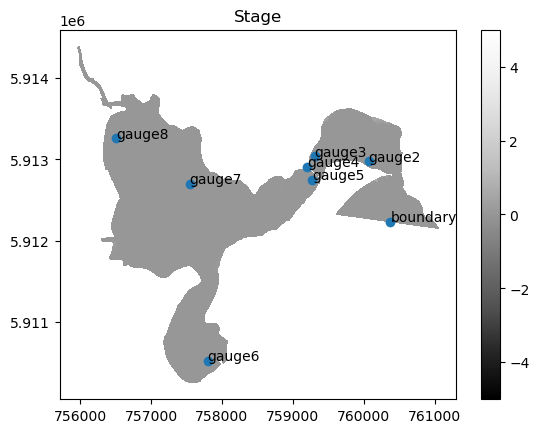

In [9]:
plt.tripcolor(splotter.triang,
              facecolors = splotter.stage[0,:],
              cmap='Greys_r',
              vmin= -5,
              vmax= 5.0
              )
plt.colorbar();
plt.title("Stage");
plt.scatter(gauge_x,gauge_y)
for i in range(8):
    plt.annotate(gauge_location['name'][i], [gauge_x[i], gauge_y[i]])


In [10]:
splotter.stage.shape

(1441, 10785)

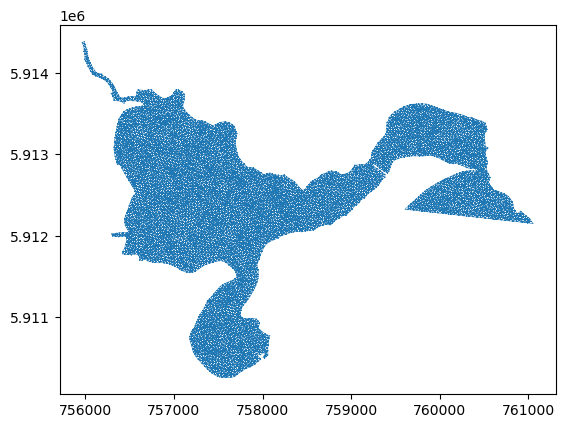

In [5]:
plt.triplot(splotter.triang, linewidth = 0.4);

In [70]:
for i in range(0,1441,10):
    print('.', end='')
    splotter.save_stage_frame(figsize=(10, 8), vmax=1.0, vmin=-1, frame=i)

splotter.make_stage_animation()

.................................................................................................................................................

In [76]:
gauge_ids

[6408, 5, 6158, 773, 4585, 6198, 3136, 3916]

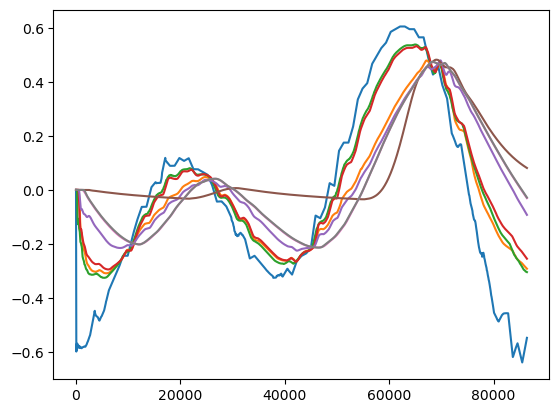

In [11]:
plt.plot(splotter.time, splotter.stage[:,gauge_ids]);

Couldn't read gauge4


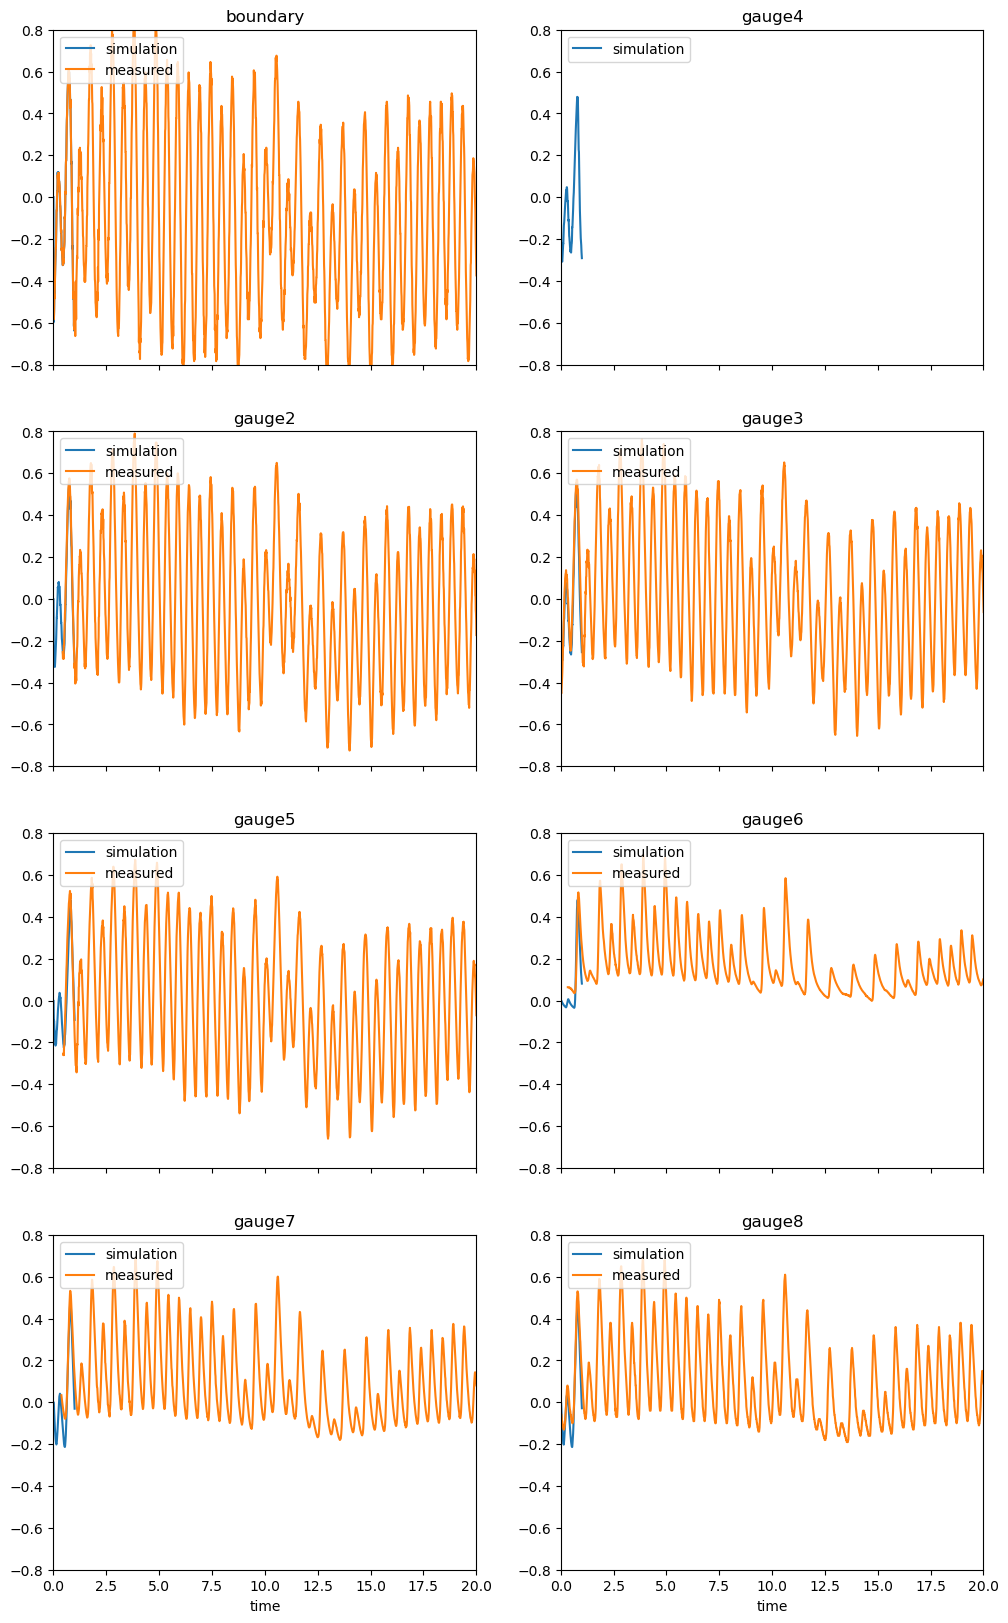

In [13]:
model_dir = '../../model_data_sept_2003'

sites = []

#for row in gauge_location.iterrows():

for index, row in gauge_location.iterrows():
    #print(row['name'])
    filename = anuga.join(model_dir,row['name']+'.txt')
    #print(filename)

    if row['name'] == 'gauge4':
        print(f"Couldn't read {row['name']}")
        site = None
    else:
        site = pandas.read_fwf(filename, header=None)
        site.columns = ['time', 'measured']
        site['time'] = site['time'] - 265

    #print(row['name'])
    sites.append(site)
        
    #fig = plt.figure(figsize=(12,5))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12,20), sharex=True)

ax = ax1

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]):
    #print(i)

    ax.set_title(gauge_location['name'][i])
    ax.plot(splotter.time/3600/24, splotter.stage[:,gauge_ids[i]], label='simulation') 

    if gauge_location['name'][i] == 'gauge4':
        pass
    else:
        sites[i].plot('time','measured', ax=ax, label='measured')

    ax.legend(loc='upper left')
    ax.set_xlim(0.0, 20.0)
    ax.set_ylim(-0.8, 0.8)

        #ax.set_title(row['name'])


